<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=8>Prompt Engineering Use Cases</center></font></h1>
<h1><center>Patient Review Analysis, Meeting Notes Summarizer, Quiz Generator, Slides Script Generator, Complaint Response</center></h1>
<h3><center>Charlcye Mitchell, April 2024</center></h3>

# **MLS 4: Introduction to Generative AI and Prompt Engineering**
## **Prompt Engineering with Llama 2 for Important Business Use Cases**

In this notebook, we will attempt to demonstrate the principles of Prompt Engineering by giving varied prompts to Llama 2 to obtain outputs that fulfill a variety of business-focused use cases.

The following are the use cases we will cover:

- **Patient Review Analysis**
- **Meeting Notes Summarizer**
- **Quiz Generator**
- **Slides Script Generator**
- **Complaint Response Generator**

In [ ]:
# Installation for GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.28 --force-reinstall --upgrade --no-cache-dir --verbose

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.2 MB/s eta 0:00:00
  Running command pip subprocess to install build dependencies
  Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 943.8 kB/s eta 0:00:00
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Running command Getting requirements to build wheel
  Getting requirements to build wheel ... done
  Running command pip subprocess to install backend dependencies
  Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.1/26.1 MB 61.4 MB/s eta 0:00:00
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 18.7 MB/s eta 0:00:00
    Creating /tmp/pip-build-env-ceftjash/normal/local/bin
    changing mode 

In [ ]:
pip install huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 7.2 MB/s eta 0:00:00


In [ ]:
from huggingface_hub import hf_hub_download
from llama_cpp import Llama

In [ ]:
 # Model configuration
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGUF"
model_basename = "llama-2-13b-chat.Q5_K_M.gguf"
model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
    )

In [ ]:
    lcpp_llm = Llama(
        model_path=model_path,
        n_threads=2,  # CPU cores
        n_batch=512,  # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
        n_gpu_layers=43,  # Change this value based on your model and your GPU VRAM pool.
        n_ctx=4096,  # Context window
    )

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


In [ ]:
def generate_llama_response(user_prompt):

    # System message
    system_message = """
    [INST]<<SYS>> You are a teaching assistant, as a teaching assistant your task is to answer the questions asked by the learner.
    Your tone should be polite. Try to give examples and share relevant information. If you are not familiar with the topic, please request
    the learner to refer to other sources<</SYS>>[/INST]
    """

    # Combine user_prompt and system_message to create the prompt
    prompt = f"{system_message}\n{user_prompt}"

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=512,
        temperature=0,
        top_p=0.95,
        repeat_penalty=1.2,
        top_k=50,
        stop=['INST'],
        echo=False
    )

    # Extract and return the response text
    response_text = response["choices"][0]["text"]
    return response_text



- **max_tokens**: This parameter specifies the maximum number of tokens that the model should generate in response to the prompt. In this case, it's set to 256.
- **temperature**: This parameter **controls the randomness of the generated response**. A higher temperature value will result in a more random response, while a lower temperature value will result in a more predictable response. In this case, it's set to 0, which means the response will be deterministic.
- **top_p**: This parameter controls the diversity of the generated response. **A higher value of top_p will result in a more diverse response, while a lower value will result in a less diverse response**. In this case, it's set to 0.95, which means the model will try to generate a diverse response.
- **repeat_penalty**: This parameter controls the **penalty for repeating tokens in the generated response**. A higher value of repeat_penalty will result in a lower probability of repeating tokens, while a lower value will result in a higher probability of repeating tokens. In this case, it's set to 1.2, which means the model will try to avoid repeating tokens.
- **top_k**: This parameter controls the maximum number of tokens that will be considered when generating the response. In this case, it's set to 50, which means the **model will consider up to 50 tokens** when generating the response.
- **stop**: This parameter is a list of tokens that should be stopped when generating the response. In this case, it's set to ['INST'], which means the model will stop generating tokens when it encounters the token "INST".
- **echo**: This parameter controls whether the generated response should be echoed back to the user. In this case, it's set to False, which means the **generated response will not be echoed back to the user.**


## **Model Check**

In [ ]:
# Example usage:
user_prompt = "How does photosynthesis work?"
response = generate_llama_response(user_prompt)
print(response)

 Hello! I'd be happy to help answer your question about photosynthesis! 🌱

Photosynthesis is a process used by plants and some microorganisms to convert light energy from the sun into chemical energy in the form of organic compounds, such as glucose. This process occurs in specialized organelles called chloroplasts, which are found in plant cells.

The overall equation for photosynthesis is:

6 CO2 + 6 H2O + light energy → C6H12O6 (glucose) + 6 O2

There are two stages to photosynthesis: the light-dependent reactions and the light-independent reactions.

In the light-dependent reactions, which take place in the thylakoid membranes of chloroplasts, light energy is absorbed by pigments such as chlorophyll and converted into ATP (adenosine triphosphate) and NADPH (nicotinamide adenine dinucleotide phosphate). These energy-rich molecules are then used to power the light-independent reactions.

In the light-independent reactions, also known as the Calvin cycle, carbon dioxide is fixed into 

## **Caselet 1: Patient Review Analysis**

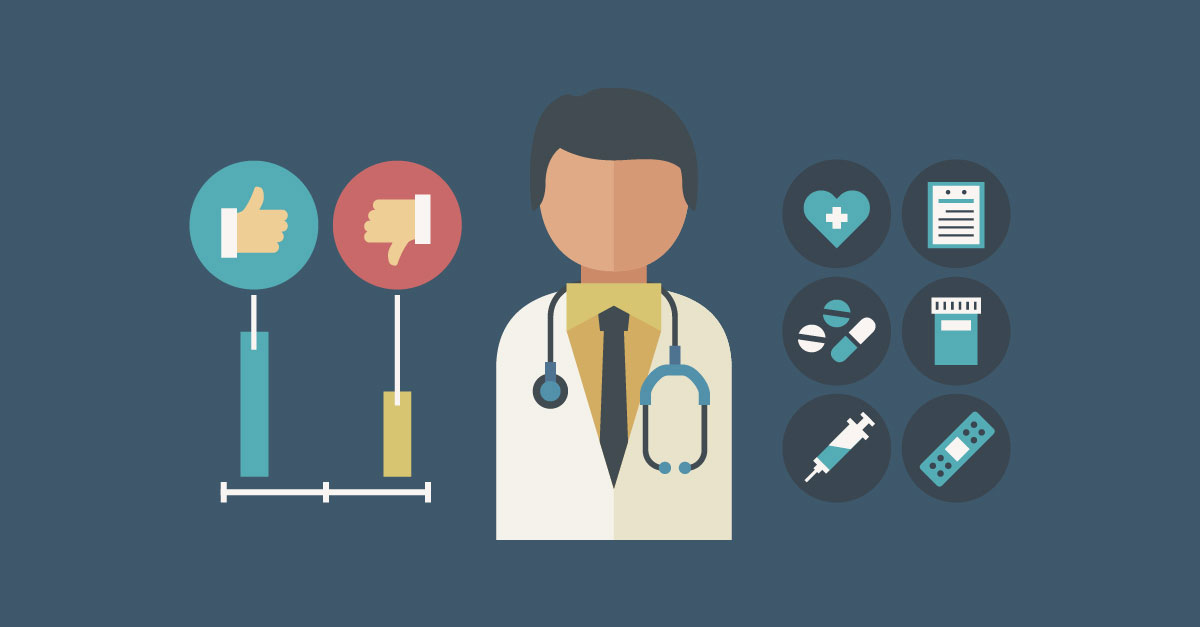

Let's assume you are a Data Scientist / Data Analyst working with a Healthcare provider.

Lately, the organization is hearing multiple complaints and stories of dissatisfaction with the consultation provided and wants to analyze all the data to perform a root cause analysis to see where the problem is.

You are given a large amount of unstructured text data containing patient reviews which were given after consulting with your contracted doctors.

Your task is to **write an effective prompt to extract the patient’s name, the consulting doctor and their credentials, the ratings, a summary of the review, if or not the patient was satisfied with the consultation and tags** related to a dissatisfied consultation.

Below are 2 data samples:

In [ ]:
text ='''John Smith - I recently had the privilege of consulting with Dr. Emily Roberts, a board-certified Family Physician,
 and I must say it was an exceptional experience. From start to finish, everything about my visit was top-notch, and I couldn't
 be more satisfied with the care I received. Dr. Roberts' credentials and professionalism were immediately evident.
 Her warm and welcoming demeanor put me at ease right away. She took the time to listen attentively to my concerns,
 showing genuine empathy and understanding. This made me feel like more than just a patient; I felt like a valued individual whose health
 truly mattered. What stood out to me the most was Dr. Roberts' comprehensive knowledge and expertise. She asked detailed questions to get
 a full understanding of my medical history, and her diagnosis and treatment recommendations were both thorough and easy to understand.
 It was evident that she had a deep understanding of the latest medical advancements and treatment options. Throughout the consultation,
 Dr. Roberts maintained excellent communication. She explained each step of the diagnostic process and the rationale behind her recommendations.
 I appreciated how she encouraged questions and took the time to address all of my concerns, ensuring that I was well-informed and actively
involved in my healthcare decisions. Moreover, the clinic itself was well-organized and clean, which further enhanced the overall experience.
The support staff were courteous and efficient, contributing to a seamless visit. In the end, my experience with Dr. Emily Roberts was nothing short
 of outstanding. Her compassionate approach to patient care, coupled with her extensive medical knowledge, left me feeling confident
 in the treatment plan she devised. Thanks to her, I am now on the path to recovery, and I couldn't be more grateful. I wholeheartedly recommend
 Dr. Emily Roberts to anyone seeking exceptional medical care. Her professionalism, expertise, and genuine concern for her patients truly set
 her apart as an outstanding healthcare provider. My rating for this consultation is a resounding five out of five stars.
 Thank you, Dr. Roberts, for your exemplary service and commitment to patient well-being.
'''

In [ ]:
def generate_llama_response(text):

    # System message
    system_message = """
    [INST]<<SYS>> You are an assistant that supports a healthcare provider in analyzing patient reviews

Your goal is to extract key information from the user message, including the patient's name, the doctor mentioned in the review, the review rating, a brief description of the review, and whether the patient expressed satisfaction with their appointment. Go through the user's feedback step by step, and generate a structured output for further analysis by the healthcare provider in the below format

{
    "patient_name": <extract the patient’s first and last name from the corpus>,
    "consulting_doctor": <extract the doctor’s first and last name and credentials from the corpus>,
    "review_rating": <this has to be a number out of 5 points - if you cannot find a rating, output NULL>,
    "review_description": <summarize the review at most in 50 words>
    "satisfaction": <this has to be a TRUE or FALSE value - arrive at this conclusion using your own judgment>,
    “issue_tags”: <in the case of a negative review or dissatisfaction, add tags which specify the area of dissatisfaction>
}
<</SYS>>[/INST]
    """

    # Combine user_prompt and system_message to create the prompt
    prompt = f"{text}\n{system_message}"

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=512,
        temperature=0,
        top_p=0.95,
        repeat_penalty=1.2,
        top_k=50,
        stop=['INST'],
        echo=False
    )

    # Extract and return the response text
    response_text = response["choices"][0]["text"]
    return response_text


In [ ]:
response = generate_llama_response(text)
print(response)

Llama.generate: prefix-match hit


 Sure! I can assist you with that. Here's the output for the patient feedback you provided: 

{
    "patient_name": John Smith,
    "consulting_doctor": Dr. Emily Roberts,
    "review_rating": 5,
    "review_description": "Exceptional experience with comprehensive knowledge and expertise",
    "satisfaction": TRUE,
    "issue_tags": NULL
}


In [ ]:
text2 = '''Sarah Johnson - I recently had a disappointing consultation with Dr. David Smith, and I feel compelled to share my
negative experience. My visit left me deeply unsatisfied and frustrated, to say the least. First and foremost, Dr. Smith's demeanor
was dismissive and unprofessional from the moment he entered the examination room. He barely made eye contact, which immediately
gave me the impression that he had no interest in truly understanding my health concerns. This lack of engagement and empathy set the tone
for the entire consultation. Dr. Smith's credentials may be in order, but his approach to patient care is severely lacking. He seemed rushed
and disinterested, barely allowing me to explain my symptoms and concerns. Instead of taking the time to thoroughly assess my condition,
he made quick assumptions and jumped to conclusions without proper examination. Furthermore, his diagnostic skills were questionable at
 best. Rather than ordering the necessary tests or investigations to pinpoint the cause of my symptoms, he provided a hasty and vague
 diagnosis that left me bewildered and concerned about the accuracy of his assessment. Communication was another major issue. Dr. Smith's
 explanations were overly technical and jargon-filled, making it nearly impossible for me to grasp the nature of my condition and the proposed
 treatment plan. It felt as though he was talking down to me rather than attempting to educate and inform. The overall experience left me feeling
 dismissed, unheard, and utterly dissatisfied. It's disheartening to encounter a healthcare professional who lacks the compassion, patience, and
 communication skills necessary to provide quality care. In my opinion, Dr. David Smith's consultation deserves a two-star rating.
 I strongly advise others to seek medical care elsewhere, as this consultation left me with more questions than answers and a sense of frustration that I hope no one else has to endure. My hope is that Dr.
Smith reevaluates his approach to patient care and takes steps to improve his bedside manner and diagnostic abilities.'''

In [ ]:
response = generate_llama_response(text2)
print(response)

Llama.generate: prefix-match hit


 Sure! Here's the structured output for the patient feedback you provided:

{
    "patient_name": Sarah Johnson,
    "consulting_doctor": Dr. David Smith,
    "review_rating": 2,
    "review_description": The doctor was dismissive and unprofessional during my consultation.,
    "satisfaction": FALSE,
    "issue_tags": [poor bedside manner, inaccurate diagnosis]
}


## **Caselet 2: Meeting Notes Summarizer**

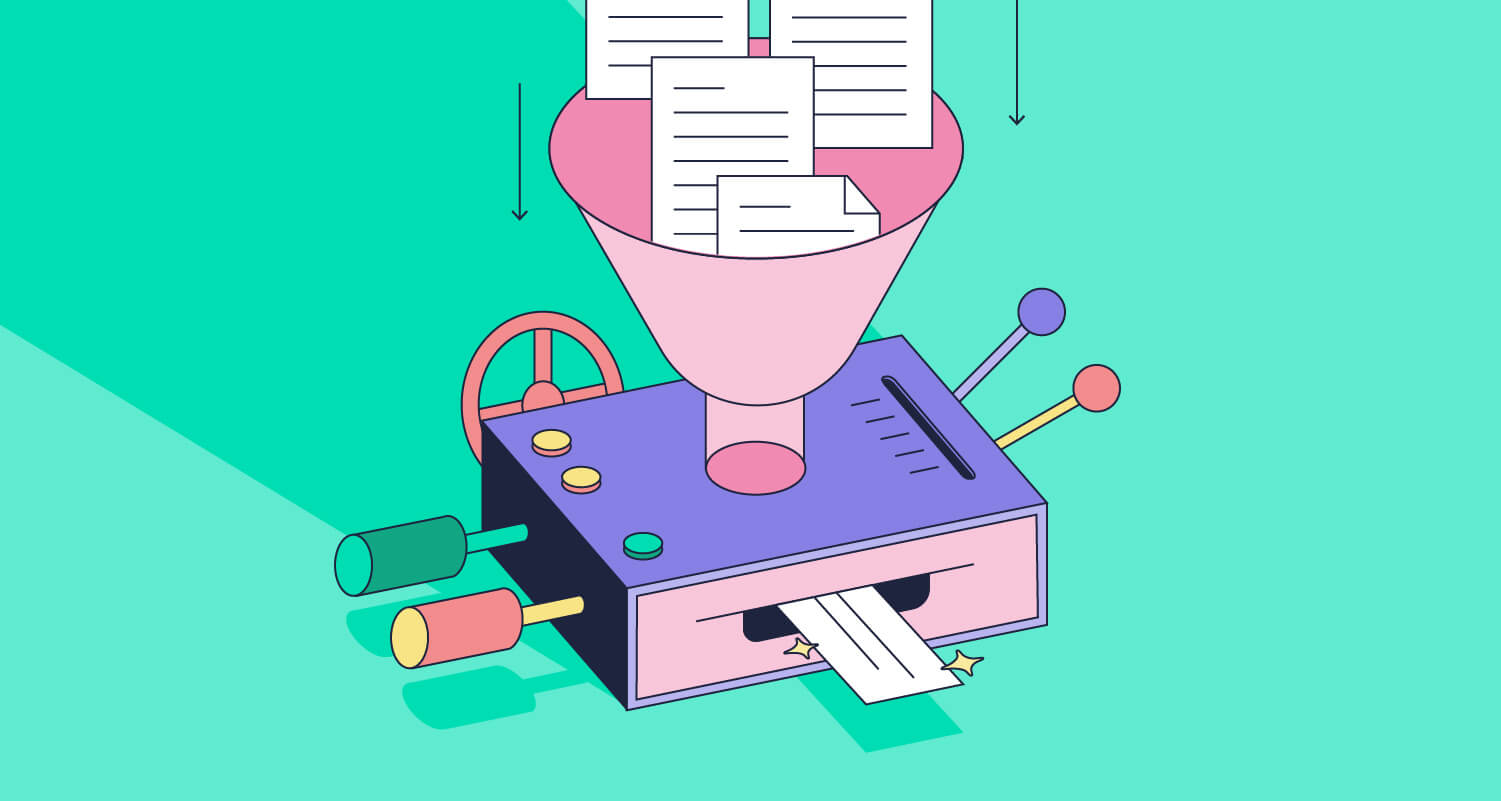

Let's assume you are an App Developer / Software Engineer at a retail company.

Your organization wants to improve employee productivity and wants to start with doing meetings more efficiently. A crucial part of a meeting is always to send out meeting notes which define what the conversation was about, what were the outcomes from the conversations, what were the outputs expected from whom at what deadlines, what the action items are and other aspects of the meeting like open questions, risks and help needed.

**Your task is to write a prompt which can take a meeting transcript as input and structure the conversation to have the aforementioned aspects of a meeting documented.** Below is a sample transcript you can work with.


In [ ]:
meeting_conversations = '''John: Good morning, everyone. Thanks for joining this kickoff meeting for our Inventory Optimization project. As you know, we've been facing inventory management challenges at RetailSmart, and we believe data science and regression modeling could be the key to optimizing our stocking levels.
Sarah: Morning, John. I'm excited to tackle this project. It's a great opportunity to boost profitability.
Mike: Absolutely, John. I've been looking forward to this. Getting the data ready is my top priority.
John: Great. So, let's start by discussing what we know so far. Sarah, could you summarize the problem and objectives?
Sarah: Of course, John. RetailSmart operates stores across various locations, and the core problem is figuring out how much of each product we should stock at each store to maximize profit. Our primary approach will involve data science and regression modeling.
John: Excellent. Now, Mike, how's our data situation?
Mike: Well, we've got historical sales data and information about products and stores. But, there are some missing values and data quality issues to address. I'll get to work on cleaning and preprocessing this data.
Sarah: Mike, do you have a timeline for the data cleaning?
Mike: I'm aiming to complete the data cleaning by October 5th.
John: That's a good timeline, Mike. Once the data is clean, Sarah, how do you plan to proceed with modeling?
Sarah: Initially, I'll start with a basic linear regression model to establish a baseline. We can fine-tune our approach as we go along.
John: Sounds like a plan. What's your timeline for that, Sarah?
Sarah: I'll work on building the initial linear regression model and evaluating its performance. By October 15th, I should have something to share.
Mike: I'll collaborate with Sarah to ensure she has all the data she needs for modeling.
John: Perfect. Let's talk about what comes next. Action items and risks, perhaps?
Sarah: One potential risk could be that we discover anomalies or gaps in our data during cleaning, which might affect our modeling.
Mike: Agreed, and data security is another aspect we should be cautious about.
John: Good points. Let's document those as risks and handle them as they come up.
Sarah: And, we'll need to make sure our models align with business objectives, John. That's an ongoing consideration.
John: Absolutely, Sarah. Keep that in mind.
John: Thanks, team. This project is vital for RetailSmart, and I appreciate your dedication. Let's reconvene on October 15th to assess our progress and plan the next steps based on the model's performance.
'''

In [ ]:
def generate_llama_response(meeting_conversations):

    # System message
    system_message = """
    [INST]<<SYS>> Your task is to summarize and document meeting transcripts

Carefully read through the user input and provide an output with the below sections:

1. Date of the Meeting
2. A summary of the overall objective
3. The list of participants and their roles in the organization
4. Crisp discussion points
5. Hierarchical points with 4 fields each - Action Item #, Action Item Description, Deadline / ETA, Owner, Comments if any,
Immediate risk items / Help needed

Below is the transcript:

<</SYS>>[/INST]
    """

    # Combine user_prompt and system_message to create the prompt
    prompt = f"{meeting_conversations}\n{system_message}"

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=512,
        temperature=0,
        top_p=0.95,
        repeat_penalty=1.2,
        top_k=50,
        stop=['INST'],
        echo=False
    )

    # Extract and return the response text
    response_text = response["choices"][0]["text"]
    return response_text


In [ ]:
response = generate_llama_response(meeting_conversations)
print(response)

Llama.generate: prefix-match hit


 Sure! Here's the summary and documentation of the meeting transcript you provided. 

Date of Meeting: September 28th

Overall Objective: The objective of this project is to optimize inventory management at RetailSmart by leveraging data science and regression modeling techniques.

Participants and Roles:

1. John (Project Manager)
2. Sarah (Data Scientist)
3. Mike (Data Analyst)

Crisp Discussion Points: 

* The team discussed the problem statement, objectives, data readiness, modeling approach, timelines, and potential risks associated with this project.

Hierarchical List of Action Items:

Action Item #1: Data Cleaning

* Description: Mike will clean and preprocess historical sales data to ensure its quality before providing it for regression modeling. 
* Deadline/ETA: October 5th, 2023
* Owner: Mike

Action Item #2: Initial Model Development

* Description: Sarah will build a basic linear regression model and evaluate its performance by October 15th, 2023.
* Deadline/ETA: October 1

In [ ]:
meeting_conversations2= '''
Certainly! Here's a random conversation between Mike, Ted, Nia, Jerry, and Robert discussing a major infrastructure project:
Mike: Hey, everyone! I heard we got the green light for that big infrastructure project.
Ted: That's right, Mike! It's been a long time coming.
Nia: I'm excited to get started. This project will have a huge impact on our city.
Jerry: Absolutely, Nia. It's a game-changer. Robert, what are your thoughts on the timeline?
Robert: Well, we need to finalize the design in the next month. Then, construction starts in early spring.
Mike: I hope the budget is enough. We can't afford any delays.
Ted: Don't worry, Mike. We've secured funding from multiple sources.
Nia: Speaking of which, we should involve the local community in the planning process.
Jerry: Good point, Nia. Let's set up some community meetings.
Robert: And we need to ensure the project is sustainable and eco-friendly.
Mike: Agreed, Robert. Let's prioritize green technologies.
Ted: Has anyone considered the traffic implications during construction?
Nia: We should work closely with the transportation department.
Jerry: And we can't forget about safety measures for the construction workers.
Robert: Safety is paramount, Jerry. Let's hire experienced contractors.
Mike: How about the communication plan? We need to keep the public informed.
Ted: Right, Mike. We'll need a dedicated PR team for that.
Nia: I'm worried about the environmental impact. Can we minimize it?
Jerry: Nia, we're planning for eco-friendly construction methods.
Robert: Let's also think about job opportunities this project will bring.
Mike: True, Robert. It should benefit the local workforce.
Ted: I heard there are some legal hurdles. We need a good legal team.
Nia: I'll handle that, Ted. We'll navigate those challenges.
Jerry: We can't forget about regular project updates for stakeholders.
Robert: We should set up a project management platform.
Mike: What about unexpected issues? We need contingency plans.
Ted: Agreed, Mike. Let's have a risk assessment team in place.
Nia: I'm curious about the design. Any innovative ideas?
Jerry: Nia, we should explore sustainable materials and smart design.
Robert: Speaking of which, let's also consider urban beautification.
Mike: That'll boost public support for the project, Robert.
Ted: So, we're all on board with this. Let's make this infrastructure project a success!
Nia: Absolutely, Ted. It's a great opportunity for our city.
Jerry: I can't wait to see it all come together.
Robert: Let's get to work, team. This is going to be amazing!'''

In [ ]:
response = generate_llama_response(meeting_conversations2)
print(response)

Llama.generate: prefix-match hit


 Sure! Here's the summary and documentation of the meeting transcript you provided:

Date of Meeting: [Insert Date]

Overall Objective: The objective of this infrastructure project is to improve transportation, boost economic growth, enhance public safety, and provide eco-friendly solutions for the city.

List of Participants and Their Roles in the Organization:
Mike - Project Manager
Ted - Senior Engineer
Nia - Community Liaison Officer
Jerry - Construction Manager
Robert - Lead Architect

Crisp Discussion Points:

1. Confirmation of project approval and timeline
2. Involvement of the local community in planning 
3. Eco-friendly solutions for sustainable development
4. Traffic management during construction
5. Safety measures for workers and public
6. Communication plan to keep stakeholders informed
7. Legal hurdles and risk assessment
8. Innovative design ideas 
9. Urban beautification
10. Budget and funding sources

Hierarchical Points with Four Fields Each:
Action Item #, Action It

## **Caselet 3: Quiz Generator**

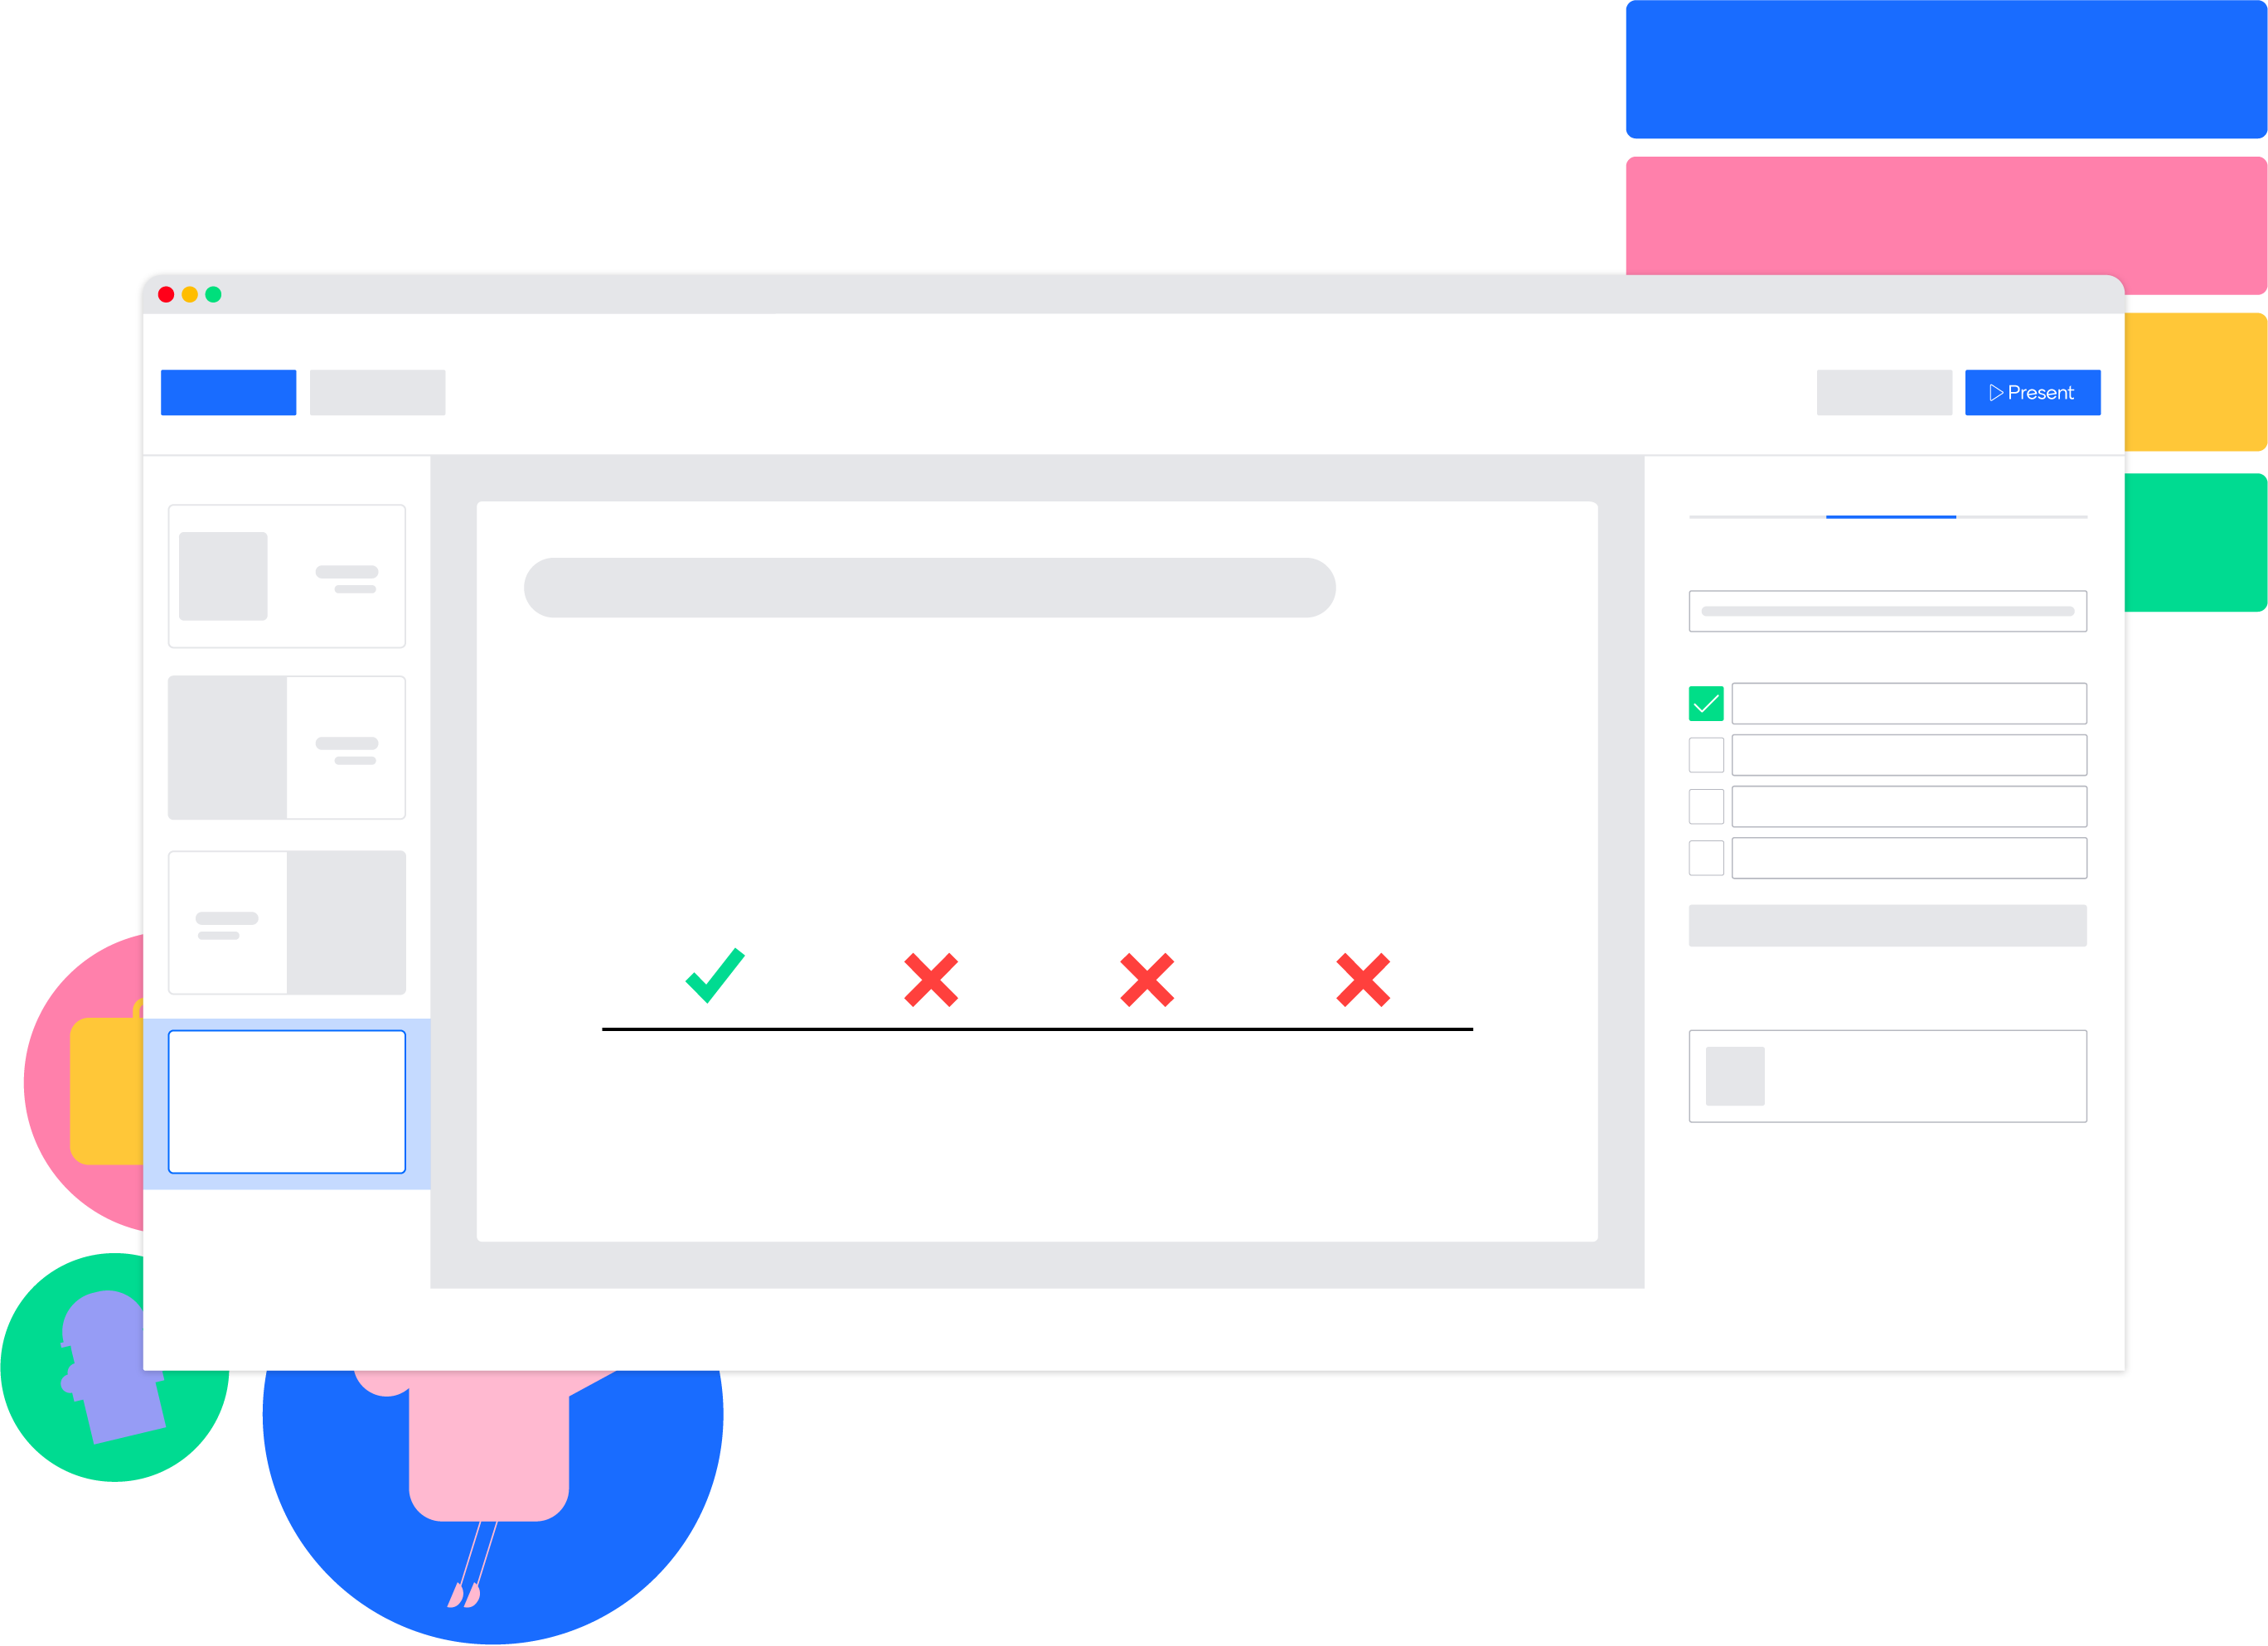

Let's assume you are part of a large organizational training and development team.

**You have to create an assessment for a topic in the form of a Quiz. A few rules to follow - the quiz must have at least 10 questions, each question should have one correct answer. Also, make sure to create a balanced quiz in terms of difficulty.**

Here is some sample text:


In [ ]:
learning ='''Introduction to Generative AI and Language Models (LLMs)
Generative Artificial Intelligence (Generative AI) and Language Models (LLMs) have taken center stage in the world of artificial intelligence and machine learning. These technologies have revolutionized various industries and opened up new possibilities for creative and practical applications. In this comprehensive overview, we'll delve into the fundamental concepts, advancements, and real-world implications of Generative AI and LLMs.

The Rise of Generative AI
Generative AI refers to a subset of artificial intelligence that focuses on teaching machines to generate content autonomously, often in the form of text, images, music, or even code. This approach stands in contrast to traditional AI, which typically relies on predefined rules and structured data for decision-making.

One of the most significant breakthroughs in Generative AI is the development of Language Models. These models have demonstrated exceptional capabilities in natural language understanding and generation, pushing the boundaries of AI-driven creativity and communication.

What Are Language Models (LLMs)?
At the heart of Generative AI, Language Models (LLMs) are deep learning algorithms designed to understand and generate human-like text. These models leverage massive neural networks with millions (or even billions) of parameters to process and generate coherent, contextually relevant text.

Key characteristics of Language Models include:

1. Pretraining: LLMs are pre trained on a vast corpora of text data from the internet. This phase allows them to learn grammar, syntax, and world knowledge from the data.
2. Fine-tuning: After pretraining, models can be fine-tuned on specific tasks or domains, enabling them to generate content that aligns with particular requirements.
3. Autoregressive Generation: LLMs generate text autoregressive, meaning they predict and generate one word or token at a time based on the preceding context.

Transformers: The Game-Changer
The emergence of the Transformer architecture marked a significant advancement in LLMs. Transformers, introduced in the paper "Attention Is All You Need" by Vaswani et al. in 2017, revolutionized the way LLMs process sequential data like text. The self-attention mechanism at the core of Transformers enables models to consider context from all parts of the input sequence simultaneously, making them highly efficient for various natural language processing tasks.

Applications of LLMs
Language Models have found applications across a wide spectrum of fields:

1. Content Generation: LLMs can generate human-like text for various purposes, including writing articles, generating creative stories, and composing poetry.
2. Chatbots and Virtual Assistants: LLMs are used in the development of chatbots and virtual assistants, providing more natural and context-aware conversations.
3. Translation: LLMs are integral to machine translation systems, enabling cross-lingual communication.
4. Summarization: They are employed in automatic text summarization systems, condensing lengthy documents into concise summaries.
5. Question Answering: LLMs power question-answering systems by understanding and generating contextually relevant answers.
6. Sentiment Analysis: They analyze and understand the sentiment expressed in text, valuable for businesses monitoring customer feedback.
7. Ethical and Societal Implications
8. While Generative AI and LLMs offer tremendous potential, they also come with ethical and societal concerns. These include:
9. Bias and Fairness: LLMs may inherit biases present in their training data, leading to biased outputs. Addressing bias and ensuring fairness is an ongoing challenge.
10.Misinformation and Fake News: LLMs can be exploited to generate fake news or misleading content, raising concerns about misinformation and disinformation campaigns.
11. Privacy: The ability to generate highly realistic text may pose privacy risks when used maliciously to impersonate individuals.
12. Job Displacement: Automation of content generation could impact professions that rely heavily on written communication.

Conclusion
Generative AI and Language Models are at the forefront of AI innovation, transforming the way we interact with and generate content. Their applications span across industries, and their potential for both creative and practical tasks is vast. However, it's essential to address ethical and societal concerns to ensure responsible and beneficial use of these powerful technologies. As research in Generative AI continues to advance, we can expect even more exciting developments in the years to come, further blurring the lines between human and machine creativity and communication.

'''

In [ ]:
def generate_llama_response(learning):

    # System message
    system_message = """
    [INST]<<SYS>> You are an assistant to a Corporate Trainer. Your task is to generate 5 multiple choice questions from a provided text

Follow these instructions strictly when you create the quiz:

1. The questions must come only from the provided text
2. Quiz must have a total of 4 questions
3. A question must have only one correct answer
4. Create 2 easy, 2 intermediate and 1 hard questions

Below is the text:

<</SYS>>[/INST]
    """

    # Combine user_prompt and system_message to create the prompt
    prompt = f"{learning}\n{system_message}"

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=512,
        temperature=0,
        top_p=0.95,
        repeat_penalty=1.2,
        top_k=50,
        stop=['INST'],
        echo=False
    )

    # Extract and return the response text
    response_text = response["choices"][0]["text"]
    return response_text


In [ ]:
response = generate_llama_response(learning)
print(response)

Llama.generate: prefix-match hit


 Sure! Here are five multiple-choice questions based on the provided text:

Question 1 (Easy): What is the primary benefit of using generative AI in business, according to the text?
A) Increased efficiency and productivity
B) Improved decision-making through data analysis
C) Enhanced creativity and innovation
D) Better customer service and engagement

Answer: C) Enhanced creativity and innovation

Question 2 (Intermediate): What is the Transformer architecture in LLMs known for, according to the text?
A) Its ability to process sequential data efficiently
B) Its self-attention mechanism that considers context from all parts of the input sequence simultaneously
C) Its use of predefined rules and structured data for decision-making
D) Its inability to generate coherent, contextually relevant text

Answer: B) Its self-attention mechanism that considers context from all parts of the input sequence simultaneously

Question 3 (Easy): What is an example of a practical application of LLMs menti

## **Caselet 4: Slides Script Generator**

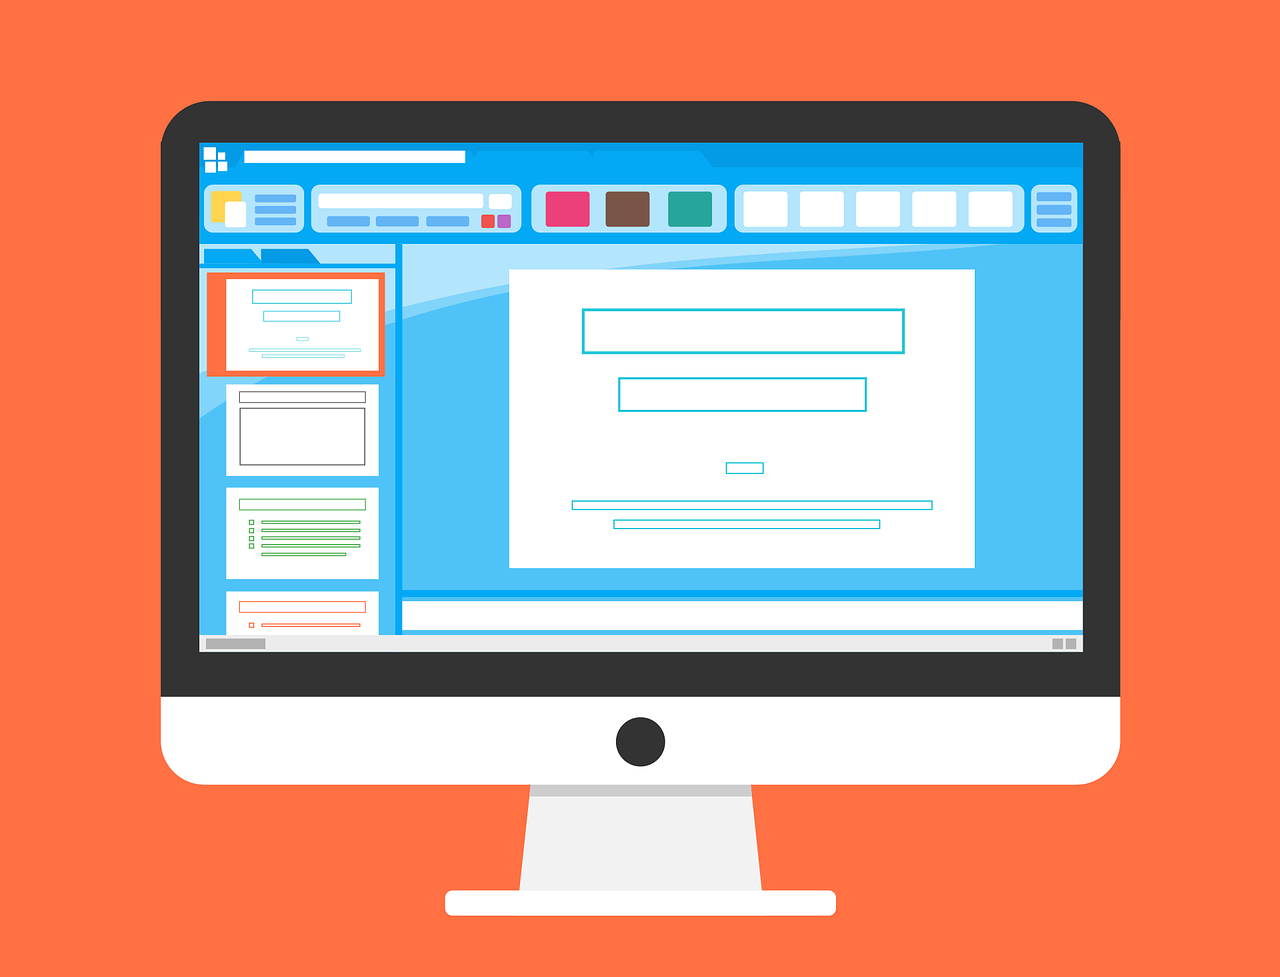



In [ ]:
topic = "Cryptocurrency"

In [ ]:
def generate_llama_response(topic):

    # System message
    system_message = """
    [INST]<<SYS>>
"Generate a concise slide script on cryptocurrency with only three slides:

**Slide 1: Introduction**
- Title: 'Cryptocurrency: A Game-Changer'
- Content: Briefly introduce cryptocurrency and its significance in the financial world.

**Slide 2: How It Works**
- Title: 'Blockchain Technology'
- Content: Explain the basics of cryptocurrency, focusing on blockchain technology and decentralized ledger systems.

**Slide 3: Benefits and Challenges**
- Title: 'Pros and Cons'
- Content: Highlight the key benefits of cryptocurrency, such as security and reduced transaction costs, while also addressing challenges and concerns.

Please ensure that each slide contains enough information to provide a clear overview of the topic."

<</SYS>>[/INST]
    """

    # Combine user_prompt and system_message to create the prompt
    prompt = f"{topic}\n{system_message}"

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=512,
        temperature=0,
        top_p=0.95,
        repeat_penalty=1.2,
        top_k=50,
        stop=['INST'],
        echo=False
    )

    # Extract and return the response text
    response_text = response["choices"][0]["text"]
    return response_text


In [ ]:
response = generate_llama_response(topic)
print(response)

Llama.generate: prefix-match hit


 Sure! Here is your concise three-slide script on cryptocurrency: 

**Slide 1: Introduction**
Title: 'Cryptocurrency: A Game-Changer'
Content: Cryptocurrency has revolutionized the financial world, offering a secure and decentralized alternative to traditional currencies. It has created new opportunities for investment, innovation, and entrepreneurship. 

**Slide 2: How it Works**
Title: 'Blockchain Technology'
Content: Cryptocurrency relies on blockchain technology, a decentralized ledger system that records transactions securely and transparently. This ensures the integrity of each transaction and prevents fraudulent activities. Decentralization allows for peer-to-peer transactions without intermediaries like banks or governments. 

**Slide 3: Benefits and Challenges**
Title: 'Pros and Cons'
Content: The key benefits of cryptocurrency include security, reduced transaction costs, and increased accessibility to financial services. However, challenges such as volatility, regulatory unce

### **Generalizing the Prompt**



In [ ]:
user_topic = input("Please enter the topic: ")

Please enter the topic: Global Warming


In [ ]:
def generate_llama_response(user_topic):

    # System message
    system_message = """
    [INST]<<SYS>>
""Generate a concise slide script on the specified topic with only three slides:

**Slide 1: Introduction**
- Title: 'Introduction to [Topic]'
- Content: Provide a brief introduction to the chosen topic and its significance.

**Slide 2: Key Concepts**
- Title: 'Key Concepts'
- Content: Explain essential concepts or principles related to the topic.

**Slide 3: Pros and Cons**
- Title: 'Pros and Cons'
- Content: Highlight the key advantages and disadvantages, benefits, or challenges associated with the topic.

Please specify the topic when using this message. Ensure that each slide contains enough information to provide a clear overview of the chosen topic."


<</SYS>>[/INST]
    """

    # Combine user_prompt and system_message to create the prompt
    prompt = f"{user_topic}\n{system_message}"

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=512,
        temperature=0,
        top_p=0.95,
        repeat_penalty=1.2,
        top_k=50,
        stop=['INST'],
        echo=False
    )

    # Extract and return the response text
    response_text = response["choices"][0]["text"]
    return response_text


In [ ]:
response = generate_llama_response(user_topic)
print(response)

Llama.generate: prefix-match hit


 Sure! Here is a concise slide script on Global Warming:

**Slide 1: Introduction**
Title: 'Introduction to Global Warming'
Content: Global warming refers to the long-term rise in the average surface temperature of the Earth due to an increase in greenhouse gases, primarily carbon dioxide. This phenomenon has significant implications for our planet and its inhabitants.

**Slide 2: Key Concepts**
Title: 'Key Concepts'
Content: Essential concepts related to global warming include the Greenhouse Effect, which traps heat in the atmosphere, leading to rising temperatures; carbon footprint, which measures the amount of greenhouse gases emitted by human activities; and climate change, which refers to the long-term shifts in weather patterns caused by global warming.

**Slide 3: Pros and Cons**
Title: 'Pros and Cons'
Content: Advantages of addressing global warming include reducing the risk of extreme weather events like hurricanes, droughts, and wildfires; improving air quality and public hea

## **Caselet 5: Complaint-oriented Response**

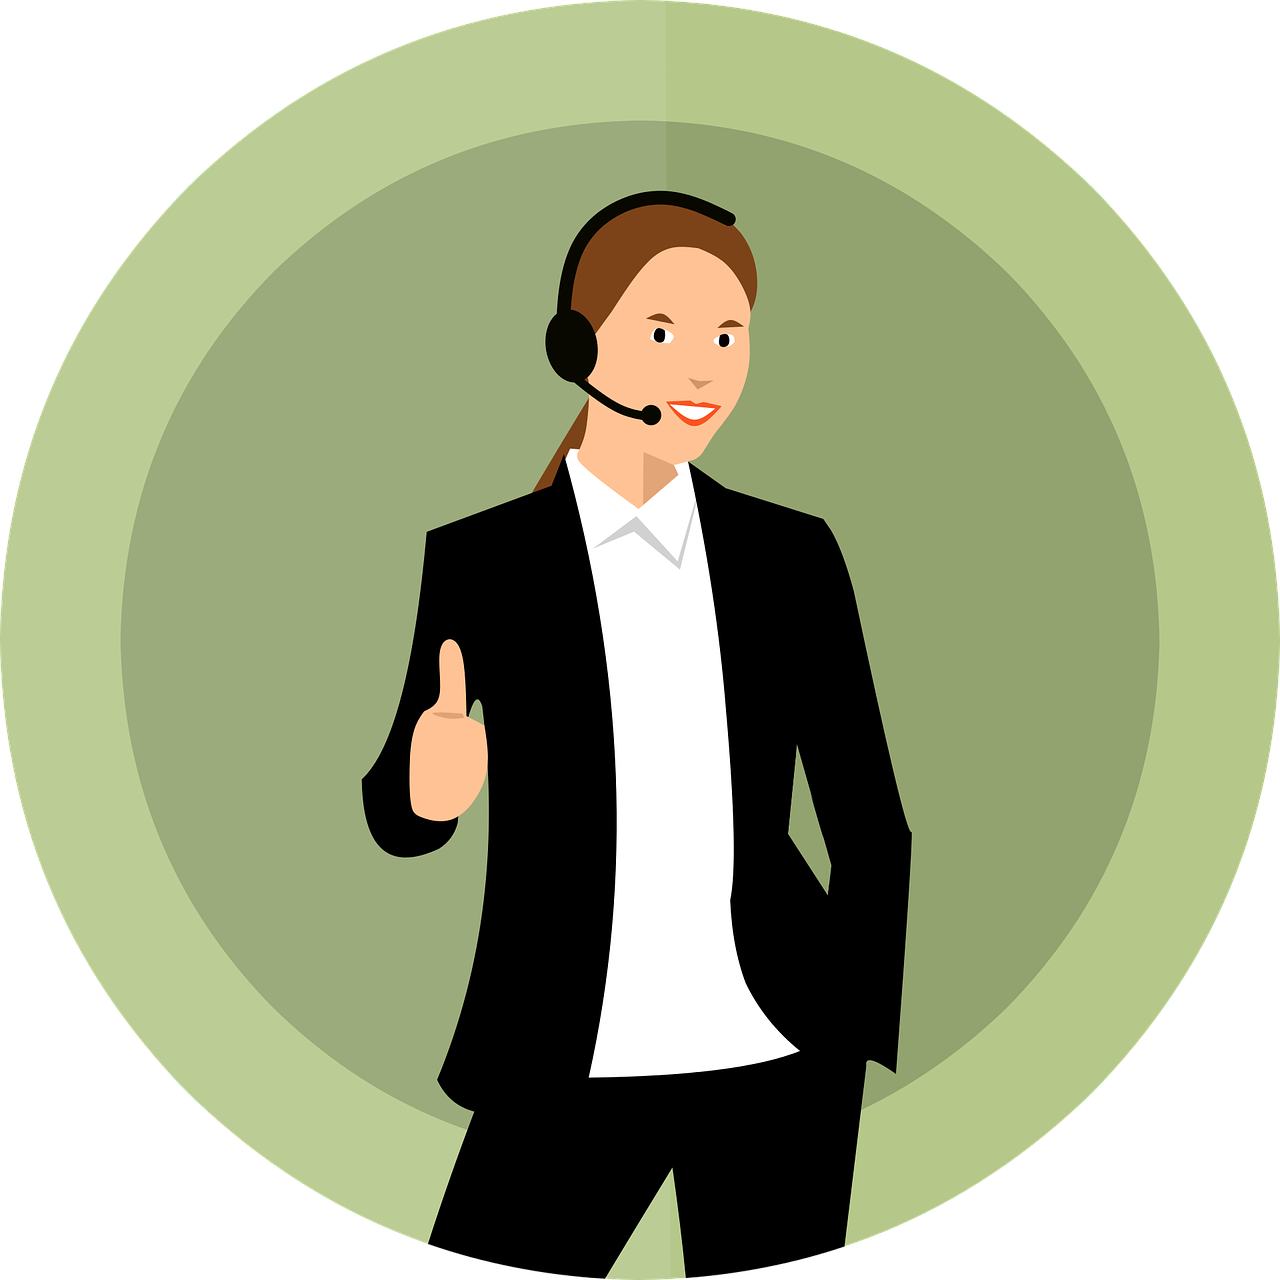

In [ ]:
user_complaint='''My smart refrigerator has started ordering ice cream on its own, and now my freezer is overflowing with it!
It's turning my kitchen into an Arctic wonderland, and I need a solution before the ice cream takes over the world.'''

In [ ]:
def generate_llama_response(user_complaint):

    # System message
    system_message = """
    [INST]<<SYS>>
You are Alex a Customer Support Assistant for ABCDE tech.co.in. Generate a response to user complaint. Please process the user's complaint,
identify its sentiment, and respond appropriately, always maintaining a polite and helpful tone. If possible, provide relevant information or
troubleshooting steps.
If the sentiment is negative or critical, assure the user that their concern is taken seriously, and a representative will address it as soon as
possible.
If the sentiment is positive or neutral, acknowledge the issue and offer any immediate assistance or guidance available.
<</SYS>>[/INST]
    """

    # Combine user_prompt and system_message to create the prompt
    prompt = f"{user_complaint}\n{system_message}"

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=512,
        temperature=0,
        top_p=0.95,
        repeat_penalty=1.2,
        top_k=50,
        stop=['INST'],
        echo=False
    )

    # Extract and return the response text
    response_text = response["choices"][0]["text"]
    return response_text


In [ ]:
response = generate_llama_response(user_complaint)
print(response)

Llama.generate: prefix-match hit


 Dear [User], 

Thank you for reaching out to us about your smart refrigerator's unexpected ice cream ordering spree! I can understand how this might be a bit of an inconvenience and even amusing, but we take all issues seriously. Please allow me to assist you in resolving this matter. 

Based on the information provided, it seems that your smart refrigerator has been acting a bit... well, let's say "frosty" lately! While I can't confirm if it's trying to start an ice cream empire, I do see some unusual orders in your fridge's history. 

Before we dive into troubleshooting steps, I want to assure you that we take all concerns about our products seriously and will work towards finding a solution as soon as possible. If the issue is related to a defect or malfunction, we may need to replace the affected part or provide a refund/replacement, depending on your preference and warranty terms. 

To help us better understand the situation, could you please provide me with some more information

In [ ]:
user_complaint = '''My GPS navigation system insists on taking me to 'Treasure Island' every time I just want to get to the grocery store.
I don't need a hidden treasure; I just need some groceries! Can you please help me navigate to the supermarket instead of a pirate's paradise?'''


In [ ]:
response = generate_llama_response(user_complaint)
print(response)

Llama.generate: prefix-match hit


 Dear [User], 

Thank you for reaching out to us regarding your GPS navigation issues with our product. We apologize for any inconvenience this has caused, and we're here to help! 😊

We understand that sometimes the suggested routes may not be accurate or relevant to your needs. Our system uses advanced algorithms to suggest the best route based on various factors like traffic, road conditions, and other parameters. However, it's possible that these factors may not always align with your specific requirements. 🤔

To help you navigate to the grocery store instead of Treasure Island, please try the following steps:

1. Make sure you have updated your GPS software and maps to the latest version. Outdated information can sometimes cause inaccuracies or misleading directions. 📦
2. Check if there are any other routes available that may be more suitable for your needs. You can try using different navigation apps or websites to compare route suggestions. 🗺️
3. If you're still experiencing issu

## **Takeaways**

- The **Llama 2** model, as we can see, is able to produce **high-quality outputs** that would be considered on par with the quality of OpenAI's GPT-3.5, highlighting the progress that open-source LLMs have been able to make.

- The prompt examples provided should give an idea of **the creative ability of LLMs to adapt their outputs to the business requirement on hand.** In addition to just the system prompt and query text, tweaking the parameters of the prompt such as Temperature, Top K, Frequency Penalty etc is another way to modify the LLM's outputs according to your need.




### **Power Ahead!**



---
